# Tiago testcases 

## Simulation of typical section aeroelastic response (based on setup at ITA LNCA)

In [2]:
include("../src/UNSflow.jl")
using UNSflow

/Users/kiran/.julia/v0.4/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')

Use "run(" instead.


### Structural and aerodynamic parameters

In [3]:
c = 0.29; #m, Chord
mass = 6.5 # + 7.0; %kg, Mass from base and typical seccion
airdensity = 1.119 #kg/m^3   ### Structural definitions
pvt = 0.43105  #Elastic Axis, Percentage from LE Pivot(0-1)

w_h = 2.38*2*pi  # rad/s Natural Frequency for H
w_alpha = 4.29*2*pi  #rad/s Natural Frequency for Alpha

x_alpha = 0.0275/c #Distance between ea and cg divided by c %Static Unbalance
r_alpha = 0.064/(c/2) # 2*sqrt(Itheta/(m*c^2)) %Radius of Gyration (Admensional)
kappa = pi*airdensity*c^2/(4*mass/0.75) 

w_alphadot = 0.
w_hdot = 1.
cubic_h_1 = 1.
cubic_h_3 = 0.
cubic_alpha_1 = 1.
cubic_alpha_3 = 0.

0.0

### Initial condition

In [4]:
alpha_init = 10*pi/180
alphadot_init = 0.
h_init = 0.
hdot_init = 0.
udot = 0


0

### Simulation control

In [5]:
dt = 0.015
lespcrit = [21;] # High value, No LEV shedding
del = DelVortDef(1, 500, 10)



UNSflow.DelVortDef(1,500,10.0)

### Case 1

In [65]:
u = 9

kinem = KinemPar2DOF(alpha_init, h_init, alphadot_init, hdot_init, u, udot, 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.)

strpar = TwoDOFPar(x_alpha, r_alpha, kappa, w_alpha, w_h, w_alphadot, w_hdot, cubic_h_1, cubic_h_3, cubic_alpha_1, cubic_alpha_3)

surf = TwoDSurf_2DOF(c, u, "FlatPlate", pvt, 70, 35, strpar, kinem, lespcrit)

curfield = TwoDFlowField()

nsteps = 1500

@time mat, surf, curfield = ldvm(surf, curfield, nsteps, dt, del)


 58.792317 seconds (1.56 G allocations: 23.521 GB, 4.45% gc time)


(
1500x8 Array{Float64,2}:
 0.000483333  0.174533  0.0         9.0  …  19.1198    3.32173    -0.575909 
 0.000966667  0.174533  0.0         9.0      0.617932  0.0585594   0.0731989
 0.00145      0.174533  0.0         9.0      0.549322  0.0462447   0.0112673
 0.00193333   0.17451   6.46614e-6  9.0      0.675085  0.0673498   0.0340981
 0.00241667   0.174459  1.27675e-5  9.0      0.663285  0.0641967   0.0445064
 0.0029       0.174378  1.88567e-5  9.0  …   0.647813  0.0604302   0.054442 
 0.00338333   0.174268  2.47881e-5  9.0      0.635555  0.0572526   0.0625699
 0.00386667   0.174128  3.05609e-5  9.0      0.625156  0.0544237   0.0692623
 0.00435      0.17396   3.61726e-5  9.0      0.616229  0.0518738   0.0748614
 0.00483333   0.173764  4.16215e-5  9.0      0.608422  0.0495399   0.0796433
 0.00531667   0.173539  4.69062e-5  9.0  …   0.60147   0.0473746   0.0837974
 0.0058       0.173285  5.20253e-5  9.0      0.595165  0.0453409   0.0874608
 0.00628333   0.173004  5.69779e-5  9.0      0.58

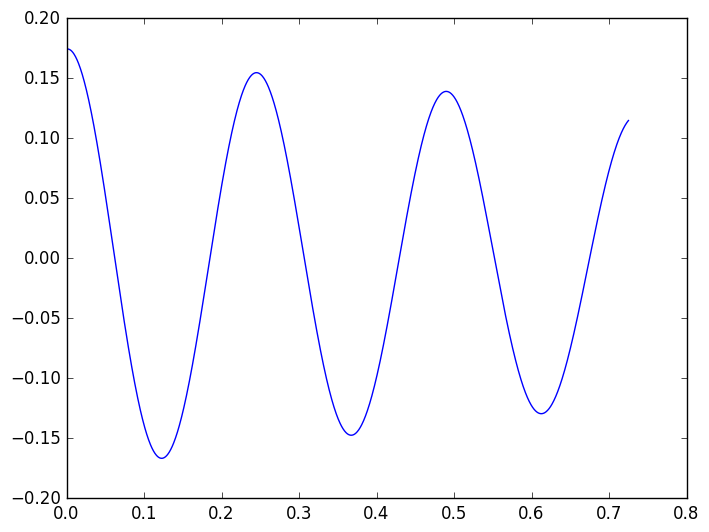

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31cc1fd50>

In [66]:
plot(mat[:,1],mat[:,2])

In [62]:
surf.adot[3]

-112.56868803151681